In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

In [2]:
df = pd.read_csv('OPENAIERC-USD.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-07,0.009758,0.022431,0.008640,0.020350,0.020350,716630
1,2022-12-08,0.020350,0.264914,0.015416,0.029237,0.029237,13807621
2,2022-12-09,0.029237,0.196895,0.028109,0.170911,0.170911,5270098
3,2022-12-10,0.170911,1.254307,0.021303,0.039266,0.039266,26391467
4,2022-12-11,0.039266,0.551347,0.016469,0.023328,0.023328,9357453
5,2022-12-12,0.023328,0.029100,0.014079,0.023604,0.023604,901092
6,2022-12-13,0.023405,0.031742,0.017644,0.020885,0.020885,528678
7,2022-12-14,0.020892,0.021030,0.015764,0.019879,0.019879,257892
8,2022-12-15,0.019896,0.019896,0.011367,0.012675,0.012675,507746
9,2022-12-16,0.012677,0.172139,0.012202,0.107290,0.107290,4697223


In [4]:
df_pr = pd.read_csv('OPENAIERC-USD.csv', na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

In [5]:
df_pr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-07,0.009758,0.022431,0.008640,0.020350,0.020350,716630
2022-12-08,0.020350,0.264914,0.015416,0.029237,0.029237,13807621
2022-12-09,0.029237,0.196895,0.028109,0.170911,0.170911,5270098
2022-12-10,0.170911,1.254307,0.021303,0.039266,0.039266,26391467
2022-12-11,0.039266,0.551347,0.016469,0.023328,0.023328,9357453


In [6]:
df_pr.index  #format %y/%m/%d

DatetimeIndex(['2022-12-07', '2022-12-08', '2022-12-09', '2022-12-10',
               '2022-12-11', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16',
               ...
               '2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26',
               '2023-09-27', '2023-09-28', '2023-09-29', '2023-09-30',
               '2023-10-01', '2023-10-02'],
              dtype='datetime64[ns]', name='Date', length=300, freq=None)

In [7]:
##checking any null values if present
print('Dataframe Shape: ', df_pr.shape)
print('Null Value Present: ', df_pr.isnull().sum())

Dataframe Shape:  (300, 6)
Null Value Present:  Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Undertanding Adjusted close price: 
* The Adjusted Close Price is a modified closing price that accounts for corporate actions, ensuring that your historical investment performance is accurately represented in the stock's price history.

* The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model. This figure indicates the stock’s closing price on that particular day of stock market trading.

### Time Series EDA

<AxesSubplot:xlabel='Date'>

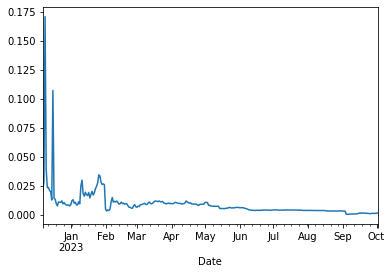

In [8]:
#Plotting the True Adj Close Value
df_pr['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

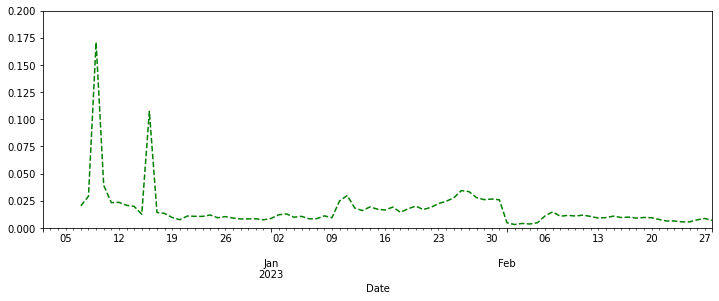

In [9]:
#x limit

df_pr['Adj Close'].plot(xlim = ['2022-12-02', '2023-02-28'],ylim =[0,0.2], figsize= (12,4),ls ='--' ,c = 'green')

In [10]:
df_pr.loc['2022-12-07']

Open              0.009758
High              0.022431
Low               0.008640
Close             0.020350
Adj Close         0.020350
Volume       716630.000000
Name: 2022-12-07 00:00:00, dtype: float64

In [11]:
share_adj_close = df_pr.loc["2022-12-07": "2023-02-28"]['Adj Close']
index =  df_pr.loc["2022-12-07": "2023-02-28"]['Adj Close'].index

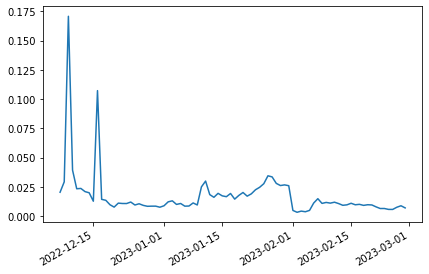

In [12]:
figure, ax = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
ax.plot(index, share_adj_close)

### Time Resampling

Max share price in particular years

In [13]:
df_pr.loc['2022-12-31']

Open             0.008449
High             0.008542
Low              0.006670
Close            0.007541
Adj Close        0.007541
Volume       30484.000000
Name: 2022-12-31 00:00:00, dtype: float64

In [14]:
## A- quaterly frequency
df_pr.resample(rule= 'QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-01,0.170911,1.254307,0.028109,0.170911,0.170911,26391467
2023-01-01,0.034404,0.065411,0.030324,0.034422,0.034422,919999
2023-04-01,0.011917,0.011940,0.010848,0.011917,0.011917,16582
2023-07-01,0.004272,0.004302,0.004199,0.004271,0.004271,18476
2023-10-01,0.001334,0.001447,0.001323,0.001447,0.001447,380


Quaterly max frequency 

<AxesSubplot:xlabel='Date'>

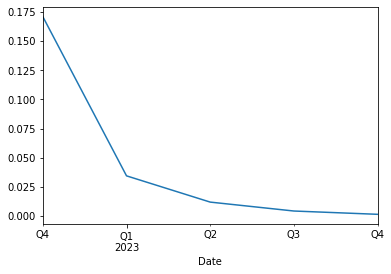

In [15]:
###quaterly Adj Close frequency

df_pr.resample(rule= 'QS').max()['Adj Close'].plot()

Monthly Mean Plot

In [16]:
#Monthly mean

df_pr['Adj Close'].resample(rule='M').mean()

Date
2022-12-31    0.024745
2023-01-31    0.019077
2023-02-28    0.008406
2023-03-31    0.009882
2023-04-30    0.009664
2023-05-31    0.006845
2023-06-30    0.004403
2023-07-31    0.004016
2023-08-31    0.003465
2023-09-30    0.001220
2023-10-31    0.001391
Freq: M, Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

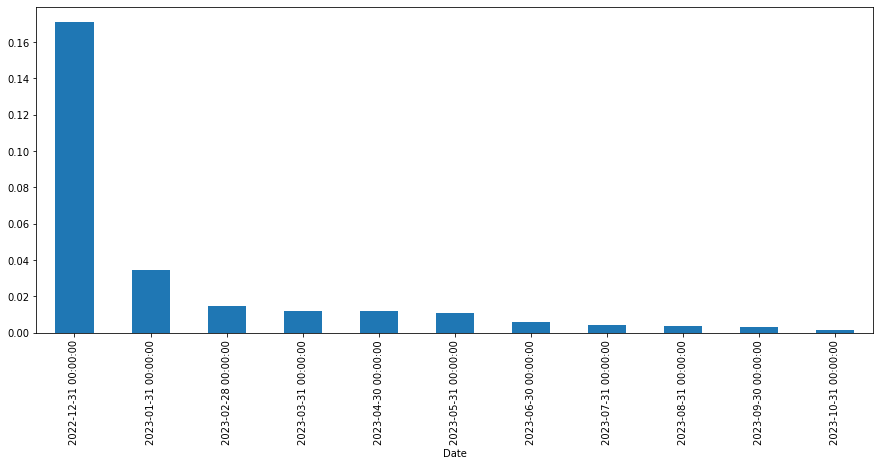

In [17]:
df_pr['Adj Close'].resample(rule='M').max().plot(kind = 'bar', figsize = (15,6))

#### Rolling

In [18]:
#rolling window for 10 Days

df_pr['High'].rolling(10).mean().head(20)

Date
2022-12-07         NaN
2022-12-08         NaN
2022-12-09         NaN
2022-12-10         NaN
2022-12-11         NaN
2022-12-12         NaN
2022-12-13         NaN
2022-12-14         NaN
2022-12-15         NaN
2022-12-16    0.256380
2022-12-17    0.269200
2022-12-18    0.244286
2022-12-19    0.225954
2022-12-20    0.101574
2022-12-21    0.047808
2022-12-22    0.046229
2022-12-23    0.044352
2022-12-24    0.043542
2022-12-25    0.042749
2022-12-26    0.026585
Name: High, dtype: float64

In [19]:
##rolling window for 30 days
df_pr['Open: 30 days rolling']= df_pr['Open'].rolling(30).mean()

In [20]:
df_pr.head(35)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2022-12-07,0.009758,0.022431,0.008640,0.020350,0.020350,716630,NaN
2022-12-08,0.020350,0.264914,0.015416,0.029237,0.029237,13807621,NaN
2022-12-09,0.029237,0.196895,0.028109,0.170911,0.170911,5270098,NaN
2022-12-10,0.170911,1.254307,0.021303,0.039266,0.039266,26391467,NaN
2022-12-11,0.039266,0.551347,0.016469,0.023328,0.023328,9357453,NaN
2022-12-12,0.023328,0.029100,0.014079,0.023604,0.023604,901092,NaN
2022-12-13,0.023405,0.031742,0.017644,0.020885,0.020885,528678,NaN
2022-12-14,0.020892,0.021030,0.015764,0.019879,0.019879,257892,NaN
2022-12-15,0.019896,0.019896,0.011367,0.012675,0.012675,507746,NaN


<AxesSubplot:xlabel='Date'>

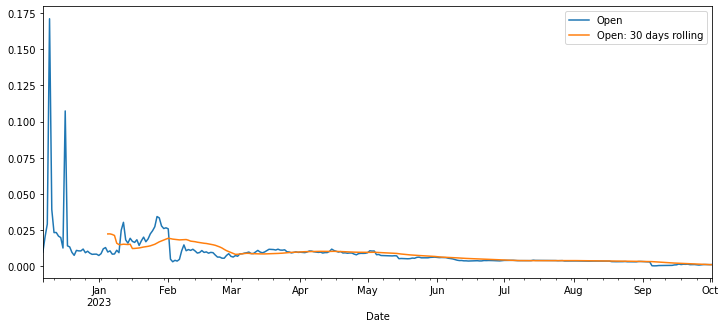

In [21]:
# helps with smoothing

df_pr[['Open', 'Open: 30 days rolling']].plot(figsize = (12,5))

In [22]:
df_pr[df_pr['High'] == df_pr['High'].max()]   #maximum high

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2022-12-10,0.170911,1.254307,0.021303,0.039266,0.039266,26391467,NaN


In [23]:
df_pr[df_pr['High'] == df_pr['High'].min()] #minimum high

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2023-09-06,0.00038,0.00041,0.000379,0.00041,0.00041,123,0.003194
